### Практические задания к уроку 5
Тема “Элементы теории вероятностей”

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.uniform(0,1)

In [6]:
for i in range(0,5):
    a = input()
    x = np.random.randint(0,36)
    if x==0:
        print('зеро', x)
    elif (x%2) == 1:
        print('красное', x)
    else:
        print('черное', x)


красное 35

черное 28

черное 20

зеро 0

красное 5


#### 2. 
1)Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [38]:
n = 20
k, m = 0, 0

for i in range(0,n):
    x = np.random.uniform(0,10)
    if x<5:
        k+=1
#         print('решка')
    else:
        m+=1
#         print('орел')
print(f'решка выпала',k,' раз из', n, ' вероятность = ', k/n)
print(f'орел выпал',m,' раз из', n, ' вероятность = ', m/n)
print('сумма вероятностей = ', (k/n)+(m/n))

решка выпала 3  раз из 20  вероятность =  0.15
орел выпал 17  раз из 20  вероятность =  0.85
сумма вероятностей =  1.0


2)Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [23]:
x = []
for i in range(0,10):
    k = np.random.rand(10)
    print(k.sum())
    x.append(k.sum())

6.998834644252871
2.602302878110687
5.177641660890535
6.324142300644977
4.365338190289257
3.2082178587155705
4.236833613123956
5.219192369832194
3.937852078197179
7.569802221415045


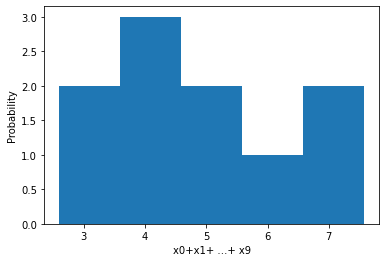

In [27]:
num_bins = 5
n, bins, patches = plt.hist(x, num_bins)

plt.xlabel('х0+х1+ …+ х9')
plt.ylabel('Probability')
plt.show()

#### 3.
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [42]:
import itertools
import math

In [63]:
k, n = 0, 10
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a+b+c+d
for i in range(0, n):
    if x[i] == 2:
        k+=1
# print(a,b,c,d)
# print(x)
print(k, n, k/n)
c_n_k = math.factorial(n)/(math.factorial(k) * math.factorial(n-k) )
# print(c_n_k)
P_x = c_n_k / (2**n)
print(P_x)

3 10 0.3
0.1171875


Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [71]:
def monte(m, n):
    k=0
    a = np.random.randint(0, 2, n)
    b = np.random.randint(0, 2, n)
    c = np.random.randint(0, 2, n)
    d = np.random.randint(0, 2, n)
    x = a+b+c+d
    for i in range(0, n):
        if x[i] == m:
            k+=1
    print(k, n, k/n)
    c_n_k = math.factorial(n)/(math.factorial(k) * math.factorial(n-k) )
    P_x = c_n_k / (2**n)
    print(P_x)

In [72]:
monte(2,10)

5 10 0.5
0.24609375


#### 4. 
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [74]:
for p in itertools.product('01', repeat=3):
    print(''.join(p))

000
001
010
011
100
101
110
111


In [76]:
for p in itertools.product('abc', repeat=3):
    print(''.join(p))

aaa
aab
aac
aba
abb
abc
aca
acb
acc
baa
bab
bac
bba
bbb
bbc
bca
bcb
bcc
caa
cab
cac
cba
cbb
cbc
cca
ccb
ccc


In [80]:
for p in itertools.permutations('abcd', 2):
    print(''.join(str(x) for x in p))

ab
ac
ad
ba
bc
bd
ca
cb
cd
da
db
dc


In [81]:
for p in itertools.combinations('abcd', 2):
    print(''.join(str(x) for x in p))

ab
ac
ad
bc
bd
cd


#### 5. 
Дополните код расчетом коэффициента корреляции x и y по формуле

[[1.         0.99455226]
 [0.99455226 1.        ]]


<ipython-input-121-68470d072170>:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a1, b1 = np.linalg.lstsq(A, y)[0]


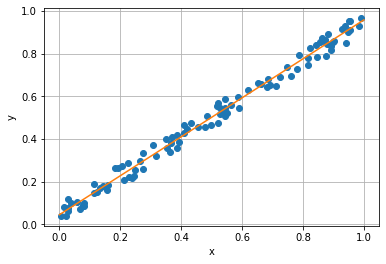

0.9952376705253234


In [121]:
n=100
r=0.9
x=np.random.rand(n)
y=r*x+(1-r)*np.random.rand(n)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
# plt.show()
c=np.corrcoef(x,y)
print(c)

a=(np.sum(x)*np.sum(y) - n*np.sum(x*y)) / (np.sum(x)*np.sum(x) - n*np.sum(x*x))
b=(np.sum(y) - a*np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
# print(a, b)
# print(a1, b1)

plt.plot([0,1], [b, a + b])
plt.show()

d= np.sum((x - b) * (y)) / np.sqrt( np.sum((x -b)**2) * np.sum((y)**2) )
print(d)